# PyTorch fMRI model fitting examples

## Setup

In [36]:
import os,sys,glob,numpy as np,pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import nibabel as nib

import hcp_utils as hcp

In [37]:
pwd

'C:\\Users\\jdavi\\Code\\libraries_of_mine\\github\\kcnischool2022-projectweek'

In [38]:
#cd ..

In [40]:
from kspw.utils import load_stockholm_data
from kspw.pytorrww import Model_fitting,h_tf,RNNWWD,plot_fit_parameters,plot_sim_states_outputs

In [ ]:
stuff = load_stockholm_data()
schaf_idxs,schaf_labs,schaf_rgbs,schaf_dat,subs,dwiconn_dfs,ptsrs_dfs,pcrs_dfs = stuff
subsesses = list(pcrs_dfs.keys())

In [ ]:
ss = subsesses[0]
mat = pcrs_dfs[ss].copy()
for ss in subsesses[1:]:
    mat+=pcrs_dfs[ss]
mat/=len(pcrs_dfs)
pcrs_mn = mat

s = subs[0]
mat = dwiconn_dfs[s].copy()
for s in subs[1:]:
    mat+=dwiconn_dfs[s]
mat/=len(dwiconn_dfs[s])
dwiconn_mn = mat


s = subs[0]
mat = dwiconn_dfs[s].apply(np.log1p).copy()
for s in subs[1:]:
    mat+=dwiconn_dfs[s].apply(np.log1p)
mat/=len(dwiconn_dfs[s])
dwiconn_log1p_mn = mat

---

In [24]:
ptsrs_dfs[sub,1]

,7Networks_LH_Vis_1,7Networks_LH_Vis_2,7Networks_LH_Vis_3,7Networks_LH_Vis_4,7Networks_LH_Vis_5,7Networks_LH_Vis_6,7Networks_LH_Vis_7,7Networks_LH_Vis_8,7Networks_LH_Vis_9,7Networks_LH_SomMot_1,...,7Networks_RH_Default_Temp_1,7Networks_RH_Default_Temp_2,7Networks_RH_Default_Temp_3,7Networks_RH_Default_PFCv_1,7Networks_RH_Default_PFCv_2,7Networks_RH_Default_PFCdPFCm_1,7Networks_RH_Default_PFCdPFCm_2,7Networks_RH_Default_PFCdPFCm_3,7Networks_RH_Default_pCunPCC_1,7Networks_RH_Default_pCunPCC_2
0,-0.020577,-0.180584,-0.112508,-0.127555,-0.227424,-0.182599,-0.088065,-0.326757,-0.191650,-0.044510,...,0.010348,0.059993,0.008919,-0.020929,0.004847,0.071965,-0.051147,0.069753,-0.068659,0.001460
1,-0.292812,-0.814547,-0.758058,0.659647,-0.491884,-0.747891,-0.142499,-0.719558,-0.320782,-0.451755,...,-0.318166,-0.606963,-0.288715,-0.319142,-0.196780,0.537544,0.380328,-0.086297,0.058313,0.570683
2,-0.467482,-0.832566,-0.778547,1.297192,-0.651813,-0.959485,0.043878,-0.523355,-0.473008,-0.276038,...,-0.327057,-0.699531,-0.532685,-0.631203,-0.650645,0.281385,0.184076,-0.252556,-0.342165,0.374913
3,-0.238297,-0.488075,-0.467828,1.258172,-0.750234,-0.781897,0.182492,-0.239311,-0.592553,0.235153,...,-0.093154,-0.243328,-0.505365,-0.805430,-1.068845,-0.254733,-0.265282,-0.143136,-0.480209,-0.078455
4,0.217355,-0.247328,-0.341693,0.436044,-0.725538,-0.461906,-0.002873,-0.367485,-0.543194,0.324082,...,0.079733,0.176863,-0.183132,-0.587388,-0.799333,-0.232544,-0.210584,0.190183,0.106432,-0.030427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.095382,0.007189,-0.208935,0.301337,0.088506,-0.446190,0.050867,-0.033179,-0.077013,0.069685,...,-0.017575,0.133909,0.014884,0.061619,0.047629,0.303766,0.238533,-0.153988,-0.072998,-0.020397
185,-0.050090,0.365922,0.130397,0.425242,0.572731,-0.612463,0.441126,0.524137,-0.104745,-0.155109,...,-0.292827,-0.290305,-0.637318,-0.015351,-0.031584,-0.467550,-0.102742,-0.245099,-0.581098,-0.648505
186,-0.261765,1.169028,0.661138,0.329833,1.110218,0.147685,0.535486,1.810512,0.598059,0.113333,...,-0.485691,-0.554852,-1.018182,0.281916,0.374643,-0.749494,-0.466086,-0.289952,-0.373844,-0.768781
187,-0.272417,1.279666,0.723230,0.201803,1.139834,0.713616,0.284230,1.957629,0.882950,0.286282,...,-0.356489,-0.403956,-0.714216,0.468090,0.614178,-0.448341,-0.397561,-0.200896,0.030546,-0.402419


In [31]:
%%time

# Sub 1, Fit gains False, 40 epochs
sub = subs[2]
sc = dwiconn_dfs[sub].values.copy()
sc = np.log1p(sc)/np.linalg.norm(np.log1p(sc))
ts = ptsrs_dfs[sub,1].values.copy()
fc_emp = np.corrcoef(ts.T)

CPU times: total: 15.6 ms
Wall time: 13.9 ms


In [ ]:
model = RNNWWD(input_size=2, node_size=100, batch_size=20, step_size=0.05, tr=2.5, sc=sc, fit_gains=True,
               g_mean_ini=80, g_std_ini = .1, gEE_mean_ini=2.5, gEE_std_ini = .1)
F = Model_fitting(model, ts, num_epochs=40)
output_train = F.train();output_test = F.test(20)
plot_fit_parameters(output_train); plot_sim_states_outputs(ts, output_test)

epoch:  0 0.015358502557212685
epoch:  1 0.025204032919908376
epoch:  2 0.05555345608836583
epoch:  3 0.05897849173392695
epoch:  4 0.08258651667578015
epoch:  5 0.1055123118672358
epoch:  6 0.1481231057822841
epoch:  7 0.10959263522221263
epoch:  8 0.1515353157521758
epoch:  9 0.12997184287630473
epoch:  10 0.170143146582086
epoch:  11 0.13537852860505917
epoch:  12 0.17548953299160722
epoch:  13 0.20877124858788673
epoch:  14 0.20806609625339006
epoch:  15 0.1636795913420919
epoch:  16 0.21361111508065425
epoch:  17 0.180240459620073
epoch:  18 0.24384232662237543
epoch:  19 0.22675335735060198
epoch:  20 0.2621236854860378
epoch:  21 0.2717410522212096
epoch:  22 0.29075277326963583
epoch:  23 0.18988549859240936
epoch:  24 0.2582050333102136
epoch:  25 0.26312604799108297
epoch:  26 0.30464039040930474
epoch:  27 0.3626718891683319
epoch:  28 0.3502463581718428
epoch:  29 0.31054693375166287
epoch:  30 0.37027653091493423
epoch:  31 0.3480709407852563
epoch:  32 0.3721194440433009


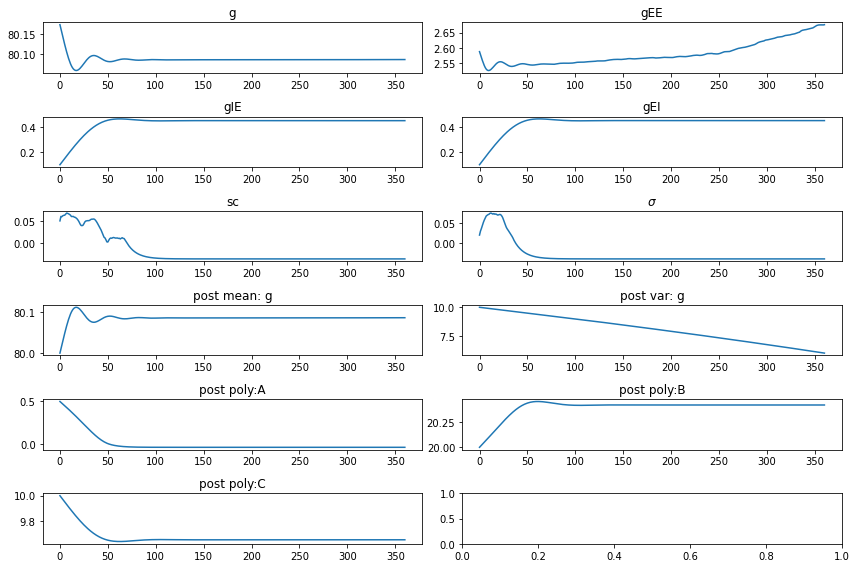

In [46]:
plot_fit_parameters(output_train); 
plt.tight_layout()

In [43]:
output_test = F.test(20)

0.5233121925084725


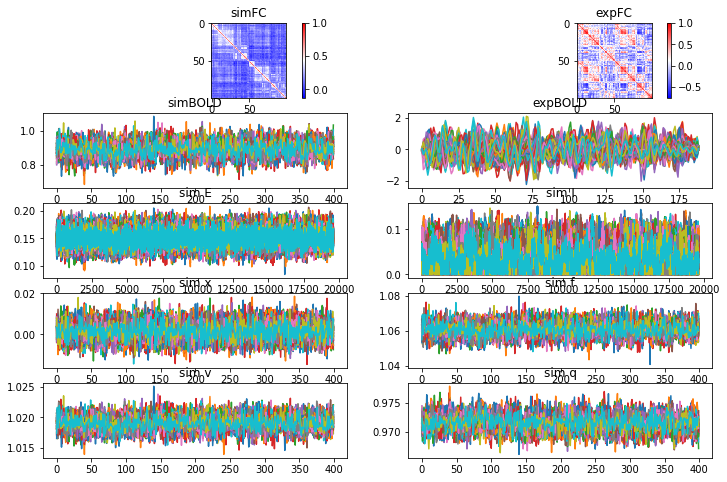

<Figure size 432x288 with 0 Axes>

In [45]:
plot_sim_states_outputs(ts, output_test)
plt.tight_layout()